# Mean Field Theory

## Essence of Mean Field Approximation (MFA): replacing fluctuating terms by averages

Let us assume that each spin i independently of each other feels some average effect of a field:

$$H_i = -J\sum_{\delta} s_i s_{i+\delta} - h s_i = -\Big(J\sum_{\delta}s_{\delta} +h \Big) s_i$$

Each spin is experiencing a local field defined by its nearest neighours. 

$$H_i = J\sum_{\delta}s_{\delta}+h$$

$$H^{eff}=\sum H_i s_i$$

> The difficulty with effective field is that $H_i$ depends on the instatnaous states of neighbouring spins of $s_i$ which flucutuate

We now make a dramaic approximations: replace the effective field by its mean field approximation where each spin is experiencing a field independent of others. The average magnetiszation per spin due to trasnlational invariance is same for every spin (in perioid cboundary conditions that is)

$$H^{MFA}_i = \langle H_i \rangle = J\sum_{\delta} \langle s_{\delta} \rangle+h = Jzm+h$$

- z=4 for 2D lattice
- z=6 for 3D lattice

**In MFA hamitlonian factors out into additive components**

Just like the exact case we had with J=0. 

$$\boxed{m = tanh(\beta(Jzm+h))}$$

**The $h=0$ MFA case**

The equation can be solved in a self-consistent manner or graphically by finding intersection between:

- $m =tanh(x)$
- $x = \beta Jzm$

When the slope is equal to one it provides a dividing line between two behaviours. 

$$k_B T_c =zJ$$

$$m = tanh \Big(\frac{Tc}{T} m \Big)$$

> **MFA shows phase transitio for 1D Ising model at finite $T=T_c$!** 

In [3]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

In [15]:
@widgets.interact(T=(0.1,5), Tc=(0.1,5)) 
def mfa_ising1d_plot(T=1, Tc=1):

    x  = np.linspace(-3,3,1000)
    
    f = lambda x: (T/Tc)*x
    m = lambda x: np.tanh(x)
    
    plt.plot(x,m(x), lw=3, alpha=0.9, color='green')
    
    plt.plot(x,f(x),'--',color='black')
    idx = np.argwhere(np.diff(np.sign(m(x) - f(x))))
    plt.plot(x[idx], f(x)[idx], 'ro')
    
    plt.legend(['m=tanh(x)', 'x'])
    
    plt.ylim(-2,2)
    plt.grid('True')
    plt.xlabel('m',fontsize=16)
    plt.ylabel(r'$tanh (\frac{Tc}{T} m )$',fontsize=16)

interactive(children=(FloatSlider(value=1.0, description='T', max=5.0, min=0.1), FloatSlider(value=1.0, descri…

In [29]:
@widgets.interact(Tc_T=(0.1,5)) 
def mfa_ising1d_plot(Tc_T=1):

    x  = np.linspace(-1,1,200)
    
    h = lambda x: np.arctanh(x) - Tc_T*x
    
    plt.plot(h(x),x, lw=3, alpha=0.9, color='green')

    plt.plot(x, np.zeros_like(x), lw=1, color='black')
    plt.plot(np.zeros_like(x), x, lw=1, color='black')
     
    plt.grid(True)

    plt.ylabel('m',fontsize=16)
    plt.xlabel('h',fontsize=16)
    plt.ylim([-1,1])
    plt.xlim([-1,1])
    

interactive(children=(FloatSlider(value=1.0, description='Tc_T', max=5.0, min=0.1), Output()), _dom_classes=('…

### Critical exponents

**A signature of phase transitions and critical phenomena is that there are universal power law behaviours near critical point**

$$m \sim |T-T_c |^{\beta}$$

$$c \sim |T-T_c|^{-\alpha}$$

$$\chi =\frac{\partial m}{\partial B} \sim |T-T_c|^{-\gamma}$$

**Correlation lengths $\xi$ diverge at critical points**

$$f(r=|j-k|) = \langle s_j s_k \rangle \sim r^{-d+2+\eta}e^{-r/\xi}$$

$$\xi \sim |T-T_c|^{-\nu}$$

### Mean field exponents

We can derive the value of critical exponent $\beta$ within mean field approximation by Taylor expanding the  hyperbolic tangent

$$tanh(x) \approx x-\frac{1}{3}x^3+...$$

$$m = tanh(\beta J z m) \approx \beta J z m - \frac{1}{3} (\beta Jzm)^3$$

- One solution is obviously m = 0 which is the only solution above $T_c$

- Below $T_c$ the non-zero solution is found $m=\sqrt{3}\frac{T}{T_c} \Big(1-\frac{T}{T_c} \Big)^{1/2}+...$ 

- $\beta_{MFA}=1/2$

### Helmholtz Free energy

$$dF_{T, M} = -SdT + BdM $$

$$F = \int dF  = F_0 + \int^{M}_0 B(M) dM$$

We will now make use of Mean field theory evaluate the integral: $h(m) = m(1-T_c/T)+ 1/3 m^3$

$$B(M) = aM +bM^3$$

$$F = F_0 + \frac{1}{2}aM^2 + \frac{1}{4} bM^4$$

Equilibirum is found by minimizing the free energy: $aM +bM^3 = 0$ with solutions M = 0 and $M=\pm (-a/b)^{1/2}$

- $T < T_c$ case we get  $a<0$ and $M=\pm (-|a|/b)^{1/2} = \pm M_S$

- $T > T_c$ case we get  $a>0$ and $M=0$



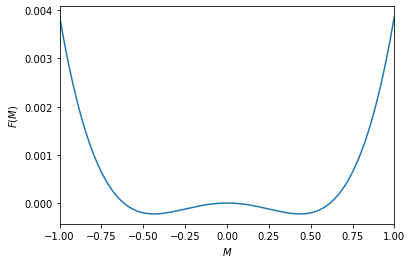

In [108]:

def HelmF(T=0.5):
  '''Tc=1'''

  a = 0.005*(T-1)
  b = 0.5*T
  M = np.linspace(-1,1,1000)
  plt.plot(M, 0.5*a*M**2 + 0.25*b*M**4)
  plt.xlim([-1,1])
  plt.ylabel('$F(M)$')
  plt.xlabel('$M$')

HelmF(T=0.05)
#HelmF(T=5)



### Problems

1. Use Transfer matrix method to solve general 1D Ising model with $h = 0$ (Do not simply copy the solution by setting h=0 but repeat the derivation :) 
<br>

2. Find the free energy per particle $F/N$ in the limit $n\rightarrow \infty $ for both periodic bounary codnition conditions and free boundary cases. 

3. Plot temperature dependence of heat capacity and free energy as a function for $(h=\neq, J\neq 0)$  $(h=0, J\neq 0)$ and $(h=\neq, J\neq \neq)$ cases of 1D Ising model. Coment on the observed behaviours.

4. Explain why heat capacity and magnetic susceptibility diverge at critical temperatures. 

5. Explain why correlation functions diverge at a critical temperature

6. Explain why are there universal critical exponents.

7. Explain why the dimensionality and range of intereactions matters for existance and nature of phase transitions.

8. Using mean field approximation show that near critical temperature magnetization per spin goes as $m\sim (T_c-T)^{\beta}$ (critical exponent not to nbe confused with inverse $k_B T$) and find the value of \beta. Do the same for magnetic susceptibility $\chi \sim (T-T_c)^{-\gamma}$ and find the value of $\gamma$

9. Explain what is the nature of mean field theory approximation and why is predictions fail for low dimensionsal systems but consistently get better with higher dimensions?

10. Consider a 1D model given by the Hamiltonian:

$$H = -J\sum^{N}_{i=1} s_i s_{i+1} + D\sum^{N}_{i=1} s^2_i $$

where $J>1$, $D>1$ and $s_i =-1,0,+1$

- Assuming periodic boundary codnitions calcualte eigenvalues of the transfer matrix

- Obtain expresions for internal energy, entropy and free energy

- What is the ground state of this model (T=0) as a function of $d=D/J$ Obtain asymptotic form of the eigenvalues of the transfer matrix in the limit $T\rightarrow 0$ in the characteristic regimes of d (e.g consider differnet extereme cases)

